# Exploratory Data Analysis

### This dataset *movies_full.csv* is downloaded to GitHub: https://github.com/nastazya/Movies-analytics/tree/master/data

In [1]:
# import the library
%matplotlib inline

import ast
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

In [2]:
df = pd.read_csv('data/movies_full_with_outliers.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
print(df.dtypes)

id                               int64
title                           object
budget                           int64
revenue                        float64
release_date            datetime64[ns]
popularity                     float64
vote_average                   float64
genres                          object
production_companies            object
cast                            object
keywords                        object
dtype: object


In [3]:
#Setting cast, production_companies, genres and keywords types to a list of dictionaries

df['genres'] = df['genres'].astype(str)
df['production_companies'] = df['production_companies'].astype(str)
df['cast'] = df['cast'].astype(str)
df['keywords'] = df['keywords'].astype(str)

df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x))
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x))
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x))

#checking results
cell = df['genres'][100]
print('\nGenres cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['production_companies'][100]
print('\nProduction_companies cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['cast'][100]
print('\nCast cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['keywords'][100]
print('\nKeywords cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))


Genres cell:  <class 'list'> . 
Cell[0]:  {'id': 16, 'name': 'Animation'} :  <class 'dict'>

Production_companies cell:  <class 'list'> . 
Cell[0]:  {'name': 'Steve Krantz Productions', 'id': 5067} :  <class 'dict'>

Cast cell:  <class 'list'> . 
Cell[0]:  {'cast_id': 2, 'character': 'Michael Corleone', 'credit_id': '52fe44289251416c91006c3f', 'gender': 2, 'id': 936451, 'name': 'Joseph Kaufmann', 'order': 0, 'profile_path': None} :  <class 'dict'>

Keywords cell:  <class 'list'> . 
Cell[0]:  {'id': 293, 'name': 'female nudity'} :  <class 'dict'>


In [4]:
#Extra adjustments for the points discovered later during the process

#replace FRF budget by USD
df.loc[df['id'] == 10656, ['budget']] = 25974
print(df.loc[df['id'] == 10656, ['title']])

#wrong revenue
df.loc[df['id'] == 9838, ['revenue']] = 15057465
print(df.loc[df['id'] == 9838, ['title']])

       title
2134  Subway
                     title
1242  King Solomon's Mines


In [5]:
# Analize release date
# We see that there is a strong tendency of grouth movies produced every year
df['year'] = df['release_date'].dt.year
df['year_month'] = pd.to_datetime(df['release_date']).dt.to_period('M')

In [6]:
#Slicing our data 

df = df[df['year']>=1980]

print(df.shape)

(4444, 13)


[0.0, 0.0, 1.0, 1.0, 3.0, 3.0, 4.0, 6.0, 9.0, 10.0, 11.0, 12.0, 13.0, 17.0, 18.0, 19.0, 27.0, 30.0, 35.0, 47.0]


([<matplotlib.axis.XTick at 0x1a898089fd0>,
 <a list of 20 Text xticklabel objects>)

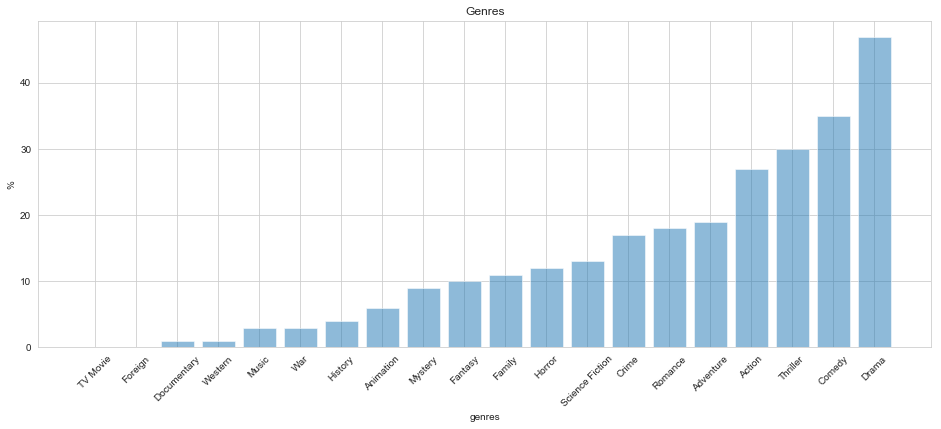

In [7]:
# Analize genres
#There are 20 genres. In our dataset there is only one TV Show and 2287 Dramas (highest number og movies in Drama)

l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
genres_all = np.array(l) 
g_name, g_count = np.unique(genres_all, return_counts=True)
genres = zip(g_name, g_count) # list of Unique Values along with occurrence Count
genres = list(genres)
genres = sorted(genres, key = lambda x: x[1])

for i, elem in enumerate(genres):
    g_name[i] = elem[0]
    g_count[i] = elem[1]

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Genres')
plt.xlabel('genres')
plt.ylabel('%')
y_pos = range(len(g_name))
g_count_pers = [round(g_count[x]*100/df['id'].count()) for x in range(len(g_count))]
print(g_count_pers)
plt.bar(y_pos, g_count_pers, align='center', alpha=0.5)
plt.xticks(y_pos, g_name, rotation=45)


Correlation between popularity and revenue: 

             popularity  revenue
popularity        1.00     0.55
revenue           0.55     1.00


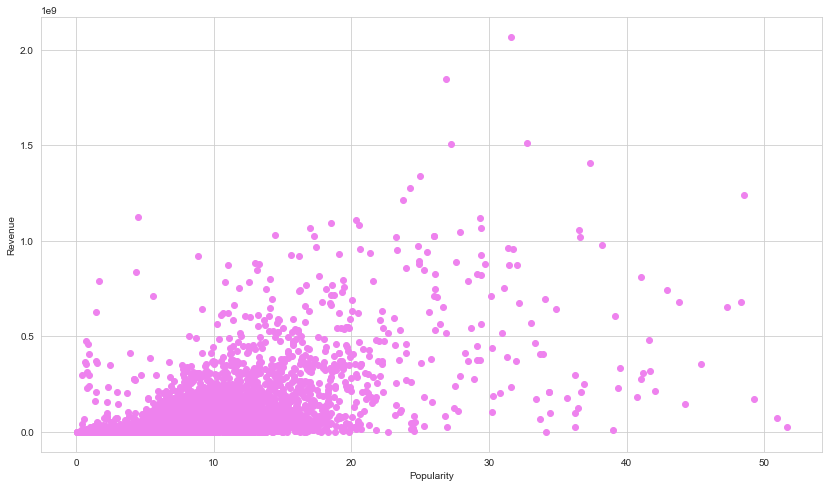

In [8]:
# Revenue VS Popularity

budget_year = df.groupby(by='year')['popularity'].sum()
#print('Total budget per year:\n', budget_year_u.sort_values(ascending=False))
revenue_year = df.groupby(by='year')['revenue'].sum()
#print('Total revenue per year:\n', revenue_year_u.sort_values(ascending=False))



#Plot scatter
plt.figure(figsize=(14,8))
plt.plot(df['popularity'], df['revenue'], 'o', color='violet')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

print('Correlation between popularity and revenue: \n\n', df[['popularity','revenue']].corr())

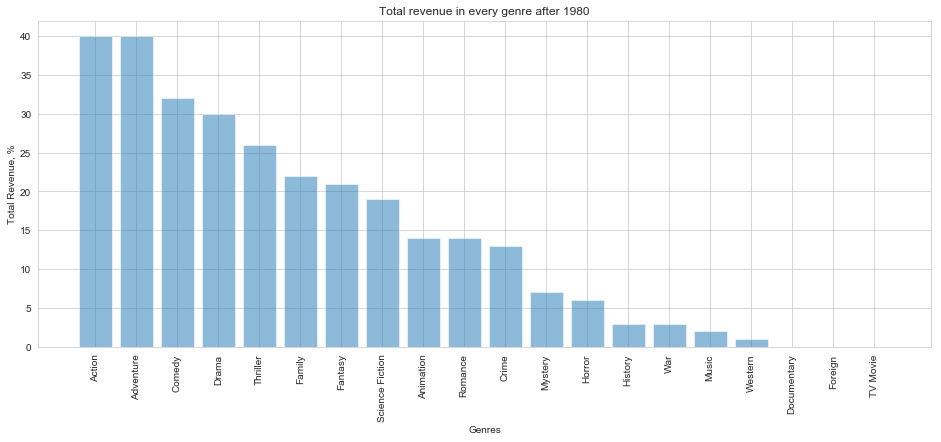

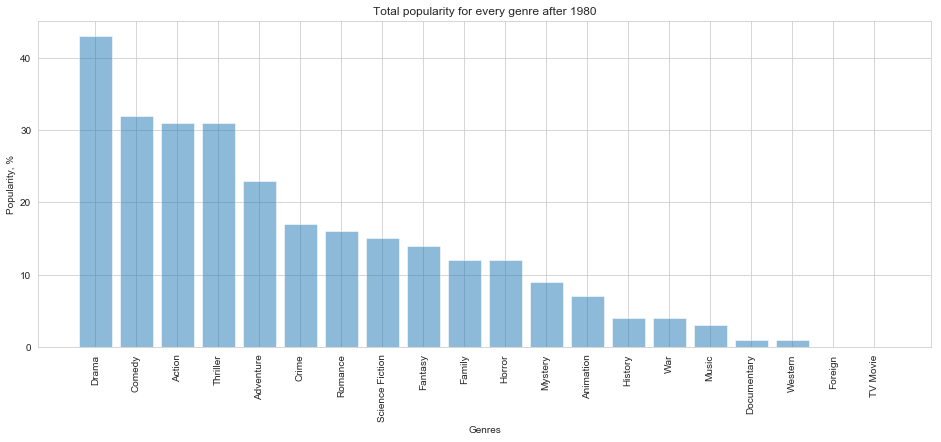

In [9]:
# Show total revenues for each genre
df_t = df


#Extracting list of genres
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
g_name, g_count = np.unique(np.array(l), return_counts=True)

#------------------------------------------------------------------------------
# Calculating total revenue of movies in every genre
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
revenue = []
for i, item in enumerate(g_name):
    r = df_t.iloc[index_extractor(df_t, 'genres', item),:]['revenue'].sum()
    revenue.append(round(r*100/sum(df_t['revenue'])))
rev_all_list = sorted(zip(g_name, revenue), key = lambda x: x[1], reverse = True) # list of names along with revenues sorted
rev_genre = [rev_all_list[x][0] for x in range(len(rev_all_list ))]
rev_value = [rev_all_list[x][1] for x in range(len(rev_all_list ))]
    
# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Total revenue in every genre after 1980')
plt.xlabel('Genres')
plt.ylabel('Total Revenue, %')
x_pos = range(len(rev_genre))
plt.bar(x_pos, rev_value, align='center', alpha=0.5)
plt.xticks(x_pos, rev_genre, rotation='vertical')
plt.show()

#------------------------------------------------------------------------------
# Calculating total popularity for every genre
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
popularity = []
for i, item in enumerate(g_name):
    p = df_t.iloc[index_extractor(df_t, 'genres', item),:]['popularity'].sum()
    popularity.append(round(p*100/sum(df_t['popularity'])))

pop_all_list = sorted(zip(g_name, popularity), key = lambda x: x[1], reverse = True) # list of names along with popularity sorted
pop_genre = [pop_all_list[x][0] for x in range(len(pop_all_list ))]
pop_value = [pop_all_list[x][1] for x in range(len(pop_all_list ))]
    
# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Total popularity for every genre after 1980')
plt.xlabel('Genres')
plt.ylabel('Popularity, %')
x_pos = range(len(pop_genre))
plt.bar(x_pos,pop_value, align='center', alpha=0.5)
plt.xticks(y_pos, pop_genre, rotation='vertical')
plt.show()


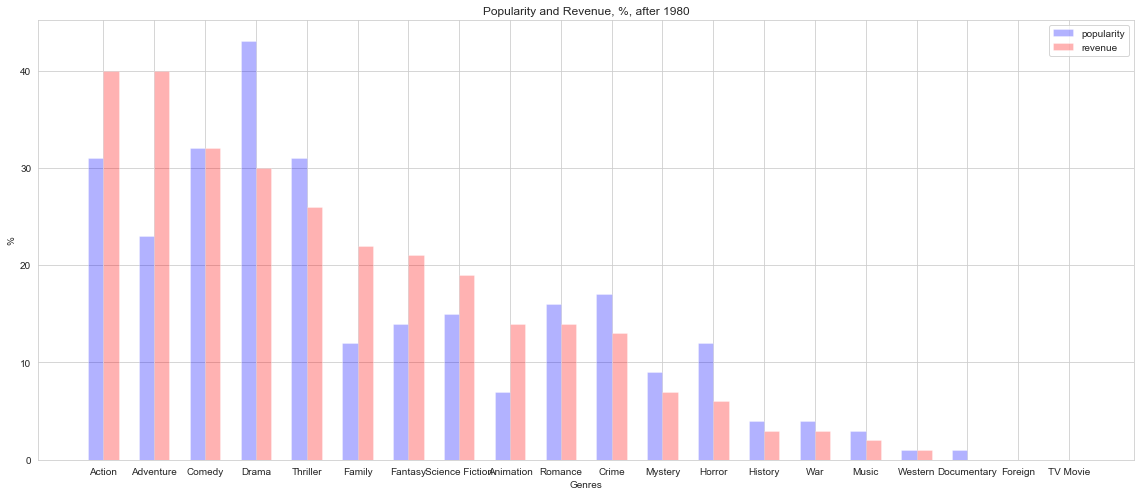

In [10]:
#Revenue and Popularity, %

rev_pop_list = sorted(zip(g_name, revenue, popularity), key = lambda x: x[1], reverse = True) # list of names along with revenues sorted
genre_values = [rev_pop_list[x][0] for x in range(len(rev_pop_list))]
pop_values = [rev_pop_list[x][2] for x in range(len(rev_pop_list))]
rev_values = [rev_pop_list[x][1] for x in range(len(rev_pop_list))]


# Bar Chart
fig, ax = plt.subplots(figsize=(16,7))
index = np.arange(len(genre_values))
bar_width = 0.3
opacity = 0.3

rects1 = ax.bar(index, pop_values, bar_width,
                alpha=opacity, color='b',
                label='popularity')

rects2 = ax.bar(index + bar_width, rev_values, bar_width,
                alpha=opacity, color='r',
                label='revenue')

ax.set_xlabel('Genres')
ax.set_ylabel('%')
ax.set_title('Popularity and Revenue, %, after 1980')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(genre_values)
ax.legend()

fig.tight_layout()
plt.show()

In [15]:
# Show four most popular genres after 2000 with the budget between 70M and 10M
df_time = df[(df['year']>=2010)&(df['budget']>=80000000)&(df['budget']<=110000000)]
print(df.shape)
#---------------------------------------------------------------------------------
# Function that takes dataframe and returns percentages of movie popularity and revenue in every genre
def movie_genre(df):
    # Extracting mean of popularity of each genre into votes
    index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
    votes = []
    revenue=[]
    budget=[]
    count=[]
    for i, item in enumerate(g_name):
        votes.append(df.iloc[index_extractor(df, 'genres', item),:]['popularity'].sum())
        revenue.append(df.iloc[index_extractor(df, 'genres', item),:]['revenue'].sum())
        budget.append(df.iloc[index_extractor(df, 'genres', item),:]['budget'].sum())
        count.append(df.iloc[index_extractor(df, 'genres', item),:]['budget'].count())
        
    # Calculating percentage
    total_v = np.sum(votes)
    total_r = np.sum(revenue)
    for i in range(len(votes)):
        votes[i] = votes[i]/total_v*100
        print(revenue[i], ' - ', budget[i], ' / ', count[i], '=')
        revenue[i] = (revenue[i]-budget[i])/count[i]
        print(revenue[i])

    # Zip and Sort by revenue (or profit)
    sorted_genres = sorted(list(zip(g_name, votes, g_count, revenue)), key = lambda x: x[3], reverse = True)
    return sorted_genres
#------------------------------------------------------------------------------
#Extracting list of genres
l=[]
for i, item in enumerate(df_time['genres']):
    for cell in item:
        l.append(cell['name'])
g_name, g_count = np.unique(np.array(l), return_counts=True)
# Taking out the genres with 0 num of movies
idx=[]
for i in range(len(g_name)):
    if g_count[i] == 0:
        idx.append(i)
g_name = np.delete(g_name, idx)
g_count = np.delete(g_count, idx)

#-----------------------------------------------------------------------------
#Extracting list of actors
l=[]
for i, item in enumerate(df_time['cast']):
    for cell in item:
        l.append(cell['name'])
a_name, a_count = np.unique(np.array(l), return_counts=True)
idx=[]
for i, item  in enumerate(a_name):
    if (item == 'Kar') | (item == 'George') | (a_name[i] == 'Mario') | (a_name[i] == 'Jack') | (a_name[i] == 'Charle') | (a_name[i] == 'Charlie') | (a_name[i] == 'Mars') | (a_name[i] == 'Terry') | (a_name[i] == 'King') | (a_name[i] == 'Sim') | (a_name[i] == 'Elli') | (a_name[i] == 'Carlos') | (a_name[i] == 'Sandra') | (a_name[i] == 'Justin') | (a_name[i] == 'Shane') | (a_name[i] == 'Angela') | (a_name[i] == 'Eve') | (a_name[i] == 'Foster') | (a_name[i] == 'Take') | (a_name[i] == 'Andrea') | (a_name[i] == 'Ade') | (a_name[i] == 'Tiffany') | (a_name[i] == 'Zoë'):
        idx.append(i)
    
a_name = np.delete(a_name, idx)
a_count = np.delete(a_count, idx)

#-------------------------------------------------------------------------------
genres_all = movie_genre(df_time)
print('2010-2017: ')
#print(df_time)
top_1=[]
for i in range(5): 
    top_1.append(genres_all[i][0])
    print(genres_all[i][0], ': ', round(genres_all[i][1],2), '%; Ave profit: ', round(genres_all[i][3],2))
    

#Creating list of lists of 10 most popular actors in each genre in top_1
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
actors = []
for i, genre in enumerate(top_1):
    df_temp = df.iloc[index_extractor(df, 'genres', genre),:]
    a_pop = []
    a_rev = []
    for actor in a_name:
        a_pop.append(df_temp.iloc[index_extractor(df_temp, 'cast', actor),:]['popularity'].sum())
        a_rev.append(df_temp.iloc[index_extractor(df_temp, 'cast', actor),:]['revenue'].sum())
   
    sorted_actors = sorted(list(zip(a_name, a_pop, a_count, a_rev)), key = lambda x: x[3], reverse = True)
    
    # Slice top 100 actors 
    a_all = sorted_actors[0:100]
    #a_temp_10 = a_temp[0:10]
    #print(genre, ': \n', a_all, '\n')
    actors.append(a_all)


#-------------------------------------------------------------------------------


(4444, 13)
9341619699.0  -  3581000000  /  38 =
151595255.2368421
11400682057.0  -  3637000000  /  38 =
204307422.5526316
6328311641.0  -  1372000000  /  15 =
330420776.06666666
9346537983.0  -  2365000000  /  26 =
268520691.65384614
2298988993.0  -  949000000  /  10 =
134998899.3
7383865101.0  -  2730000000  /  28 =
166209467.89285713
7492023886.0  -  1803000000  /  20 =
284451194.3
4714112290.0  -  1592000000  /  17 =
183653664.11764705
813207321.0  -  454000000  /  5 =
71841464.2
1333592632.0  -  550000000  /  6 =
130598772.0
3003543923.0  -  865000000  /  9 =
237615991.44444445
4280220329.0  -  1496000000  /  15 =
185614688.6
6541214701.0  -  2537000000  /  27 =
148304248.1851852
1167171346.0  -  489000000  /  5 =
135634269.2
587728874.0  -  190000000  /  2 =
198864437.0
2010-2017: 
Animation :  4.96 %; Ave profit:  330420776.07
Family :  6.39 %; Ave profit:  284451194.3
Comedy :  10.02 %; Ave profit:  268520691.65
Romance :  3.28 %; Ave profit:  237615991.44
Adventure :  15.29 %; 

['Animation', 'Family', 'Comedy', 'Romance', 'Adventure']


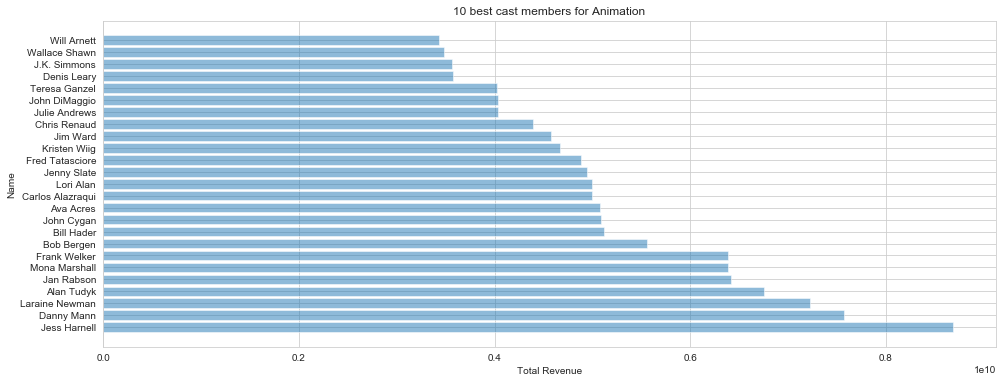

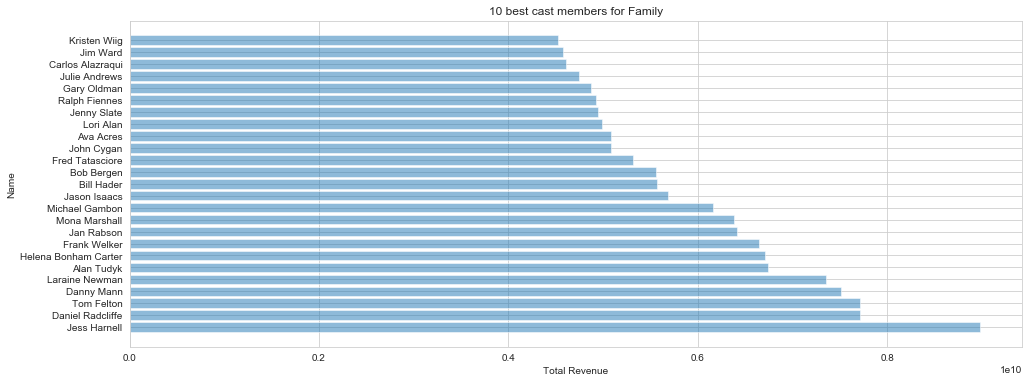

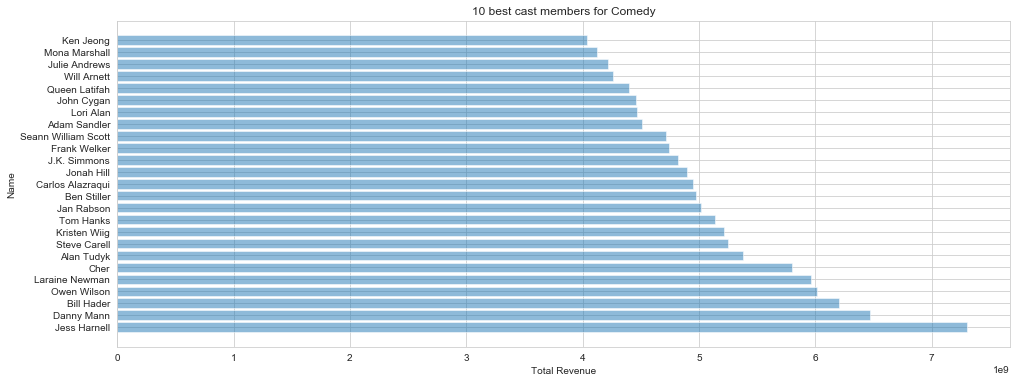

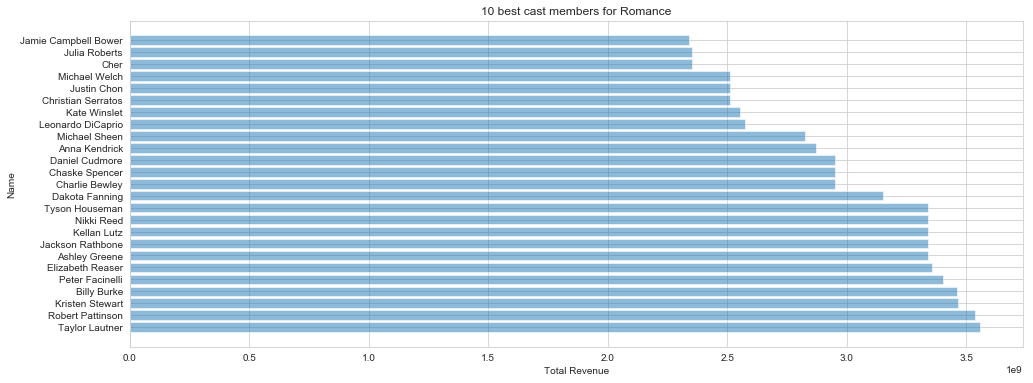

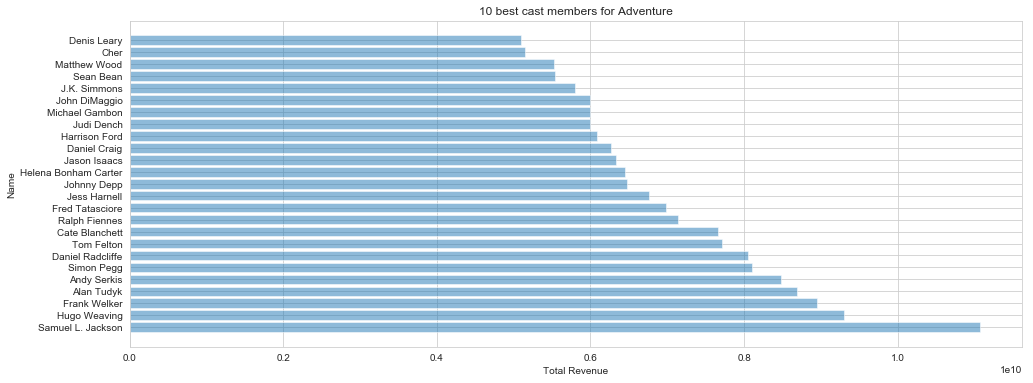

In [24]:
#plotting only 10 top artists foe each genre

print(top_1)
for i, genre in enumerate(actors):
    genre = genre[0:25]
    # Bar Chart
    plt.figure(figsize=(16,6))
    plt.title('10 best cast members for '+top_1[i])
    plt.xlabel('Total Revenue')
    plt.ylabel('Name')
    y_pos = [genre[x][0] for x in range(len(genre))]
    x_pos = [genre[x][3] for x in range(len(genre))]
    plt.barh(y_pos, x_pos, align='center', alpha=0.5)
    #plt.yticks(y_pos, , rotation='horisontal')
    plt.show()

In [31]:
# Creating two lists of top 100 actors 

print(top_1)
for i, genre in enumerate(top_1):
    if (genre == 'Adventure'):
        g1_actors = []
        g1_count = []
        for j, actor in enumerate(actors[i]):
            g1_actors.append(actor[0])
            g1_count.append(actor[2])
    if (genre == 'Family'):
        g2_actors = []
        g2_count = []
        for j, actor in enumerate(actors[i]):
            g2_actors.append(actor[0])
            g2_count.append(actor[2])
    
# Finding actor intersections:
g1_g2_actors= []
g1_g2_count_g1 = []
g1_g2_count_g2 = []
for i in range(len(g1_actors)):
    if g1_actors[i] in g2_actors:
        g1_g2_actors.append(g1_actors[i])
        g1_g2_count_g1.append(g1_count[i])
        g1_g2_count_g2.append(g2_count[i])
        print(g1_actors[i], '. G1_count: ', g1_count[i], ', G2_count: ', g2_count[i])

print(len(g1_g2_actors), len(g1_g2_count_g1), len(g1_g2_count_g2))

['Animation', 'Family', 'Comedy', 'Romance', 'Adventure']
Frank Welker . G1_count:  3 , G2_count:  1
Alan Tudyk . G1_count:  1 , G2_count:  1
Simon Pegg . G1_count:  2 , G2_count:  1
Daniel Radcliffe . G1_count:  1 , G2_count:  1
Tom Felton . G1_count:  1 , G2_count:  3
Ralph Fiennes . G1_count:  1 , G2_count:  1
Fred Tatasciore . G1_count:  1 , G2_count:  1
Jess Harnell . G1_count:  1 , G2_count:  1
Johnny Depp . G1_count:  2 , G2_count:  1
Helena Bonham Carter . G1_count:  1 , G2_count:  1
Jason Isaacs . G1_count:  1 , G2_count:  1
Michael Gambon . G1_count:  1 , G2_count:  2
John DiMaggio . G1_count:  1 , G2_count:  1
J.K. Simmons . G1_count:  1 , G2_count:  1
Cher . G1_count:  1 , G2_count:  1
Denis Leary . G1_count:  2 , G2_count:  3
Brendan Gleeson . G1_count:  5 , G2_count:  1
Jamie Campbell Bower . G1_count:  1 , G2_count:  1
John Hurt . G1_count:  1 , G2_count:  1
Liam Neeson . G1_count:  1 , G2_count:  1
Patrick Stewart . G1_count:  1 , G2_count:  2
Gary Oldman . G1_count:  1

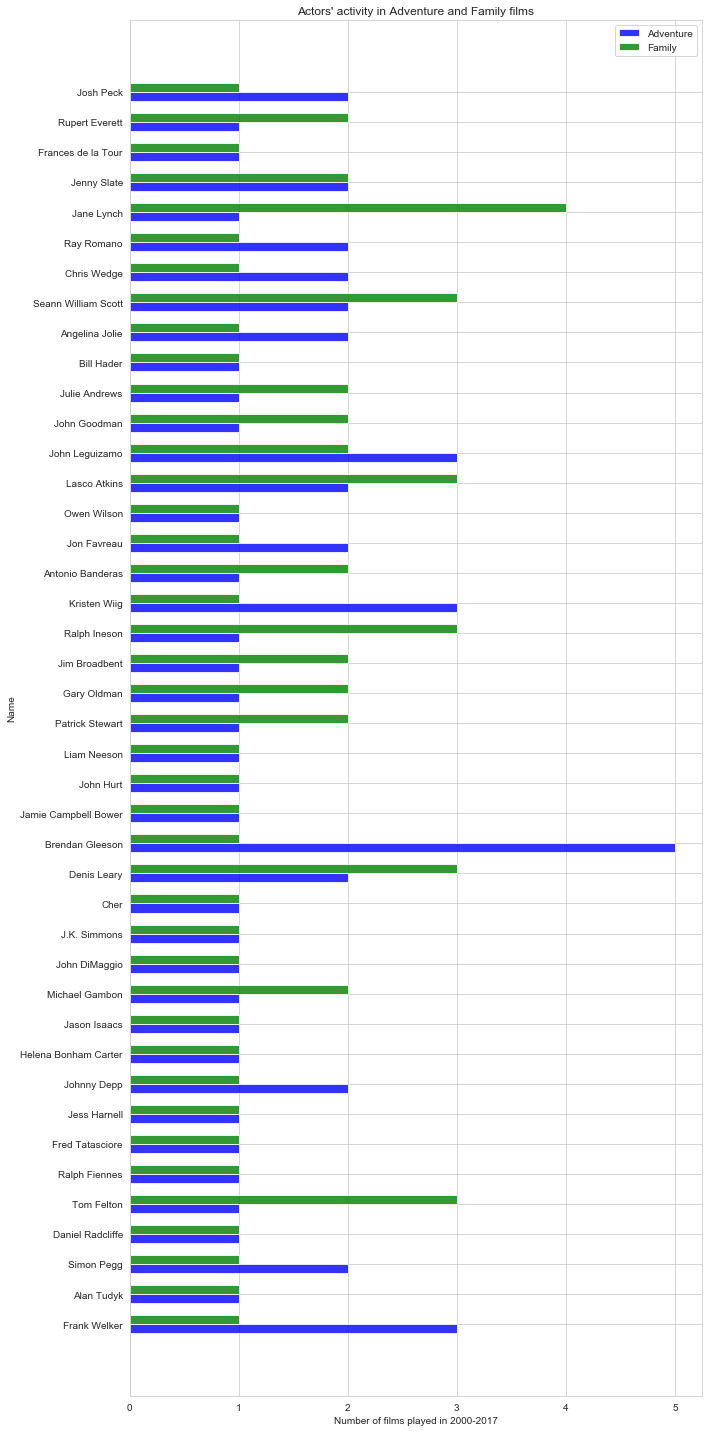

In [38]:
# Bar Chart
fig, ax = plt.subplots(figsize=(10,20))
index = np.arange(len(g1_g2_actors))
bar_width = 0.3
opacity = 0.8

rects1 = ax.barh(index, g1_g2_count_g1, bar_width,
                alpha=opacity, color='b',
                label='Adventure')

rects2 = ax.barh(index + bar_width, g1_g2_count_g2, bar_width,
                alpha=opacity, color='g',
                label='Family')

ax.set_xlabel('Number of films played in 2000-2017')
ax.set_ylabel('Name')
ax.set_title("Actors' activity in Adventure and Family films")
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(g1_g2_actors)
ax.legend()
fig.tight_layout()
plt.show()